<a href="https://colab.research.google.com/github/amien1410/colab-notebooks/blob/main/Common_Crawl_ChatGPT_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common Crawl Analysis



In [1]:
# Data download
import urllib
import gzip
import csv
# Data analysis
import pandas as pd
import numpy as np

# Data

Download sample from Common Crawl database.

In [2]:
base = "https://data.commoncrawl.org/"

path = "crawl-data/CC-MAIN-2023-14/wet.paths.gz"

def gunzip(source_filepath, dest_filepath):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read()
            if not block:
                break
            else:
                d_file.write(block)

urllib.request.urlretrieve(base + path, 'wet.paths.gz', reporthook=None, data=None)

gunzip("wet.paths.gz", "wet.paths.txt")

In [3]:
with open('wet.paths.txt', 'r') as f:
  sample_urls = [f.strip() for f in f.readlines()]

# path = "crawl-data/CC-MAIN-2023-14/segments/1679296943471.24/wet/CC-MAIN-20230320083513-20230320113513-00010.warc.wet.gz"
path = np.random.choice(sample_urls)

urllib.request.urlretrieve(base + path, 'sample.warc.wet.gz', reporthook=None, data=None)

gunzip("sample.warc.wet.gz", "sample.warc.wet.txt")

In [ ]:
# with open('sample_wet.txt', 'r') as f:
#   for i in range(100):
#     print(f.readline())

Process the data and output to csv for further use.

In [4]:
# Fields from WET header
fields = ['WARC-Type', 'WARC-Target-URI', 'WARC-Date', 'WARC-Record-ID',
          'WARC-Refers-To', 'WARC-Block-Digest',
          'WARC-Identified-Content-Language', 'Content-Type', 'Content-Length']

data = []
with open('sample.warc.wet.txt', 'r', encoding='utf-8', errors='ignore') as f:
    # Skip file-level metadata
    line = f.readline()
    while len(line.strip()) > 0:
        line = f.readline()
    line = f.readline()

    sample = {}
    text = ""
    i = 0

    while line:
        if line.startswith('WARC/1.0'):
            if i > 0:
                # Clean the text before storing
                clean_text = text.replace('\n', ' ').replace('\r', ' ').strip()
                clean_text = ' '.join(clean_text.split())  # Collapse extra spaces
                sample["text"] = clean_text
                data.append(sample)
            i += 1
            sample = {}
            text = ""

            # Parse WARC headers
            for _ in range(len(fields)):
                line = f.readline()
                if ":" in line:
                    key, val = line.split(":", 1)
                    sample[key.strip()] = val.strip()
        else:
            text += line
        line = f.readline()

# Convert to DataFrame
df = pd.DataFrame(data)

# Optional: reorder columns to include 'text' at end
columns = fields + ['text']
df = df[columns]

# Export to safe CSV
df.to_csv('cleaned_commoncrawl.csv', index=False, encoding='utf-8-sig', quoting=csv.QUOTE_ALL)

In [7]:
# df["text"] = df["text"].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()

# Take the first 1000 rows as a sample
sample_df = df.head(1000)

# Save the sample to a new CSV file
sample_df.to_csv("commoncrawl_sample_1000.csv",
                 index=False,
                 encoding='utf-8-sig',
                 quoting=csv.QUOTE_ALL)

In [ ]:
df.to_csv("WARC-WET-sample.csv")

## High Level Information

In [ ]:
df.head()

,WARC-Type,WARC-Target-URI,WARC-Date,WARC-Record-ID,WARC-Refers-To,WARC-Block-Digest,WARC-Identified-Content-Language,Content-Type,Content-Length,text
0,conversion,http://020gzbanjia.com/wap/vjvsrd/253237678_39...,2023-04-01T23:32:30Z,<urn:uuid:4ca84ee0-947c-449e-8800-25ec23edd605>,<urn:uuid:b91b8454-ed45-43a2-830b-c36983dcf562>,sha1:CXLB47LESLQEHLH7ULG7AONHY6ZF3V5D,"zho,eng",text/plain,153,\n无法访问此网站\n检查是否有拼写错误。\n如果拼写无误，请尝试运行 Windos 网络诊...
1,conversion,http://0rb.jnp836.icu/nhhn7l/811268.html,2023-04-01T23:14:47Z,<urn:uuid:7d6fb2ea-0718-4ee1-8435-6de0e4310b52>,<urn:uuid:2e9d2f6d-a787-4020-8cab-09cf04a99a20>,sha1:Y3JQ42C3IRE5AG65LVRKXZ4TND7NSTSA,kor,text/plain,3929,\nw88무료 가입 mgm바카라 조작\nw88무료 가입 mgm바카라 조작\n마카오 ...
2,conversion,http://0sdilscn6.ty888885.com/book/198529409.html,2023-04-01T23:31:23Z,<urn:uuid:c611de57-c619-492d-98fc-d350b55ebf2b>,<urn:uuid:d6bf19a8-bcdd-490b-918a-b319ae3c7c3d>,sha1:Z4ZT2Q7SSFQEXTMPH5P56VBAT2QWD4NV,"zho,eng,nno",text/plain,1021,\n鸭脖娱乐ios版app下载网址\n鸭脖娱乐ios版app下载网址\nOpen Menu\...
3,conversion,http://10-play-deposit-casino-60-with-453.mayk...,2023-04-01T23:03:18Z,<urn:uuid:4b88d7d2-2c0e-4e31-a731-9018f9d64b3d>,<urn:uuid:cd774022-50de-43f7-bd14-7fb13a7f10f2>,sha1:KS7H4XVOKDFOURDVXU5JB7O3KAPR2O64,"ces,eng",text/plain,2622,"\nViděli jsme také Dysarta Dynama, který je na..."
4,conversion,http://1001qfo.info/content/view/81/6/,2023-04-02T00:09:04Z,<urn:uuid:694cdf9b-6f43-4ed5-8637-d29c2c6c653d>,<urn:uuid:5d2e17e7-26fd-480b-9656-2a7e4acdb737>,sha1:HYP76FJALIV6EQASWMYY7XI76PPCYQBN,"rus,eng",text/plain,4279,\n- Что такое континентальный шельф?\n_SKIP_TO...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37476 entries, 0 to 37475
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   WARC-Type                         37476 non-null  object
 1   WARC-Target-URI                   37476 non-null  object
 2   WARC-Date                         37476 non-null  object
 3   WARC-Record-ID                    37476 non-null  object
 4   WARC-Refers-To                    37476 non-null  object
 5   WARC-Block-Digest                 37476 non-null  object
 6   WARC-Identified-Content-Language  37476 non-null  object
 7   Content-Type                      37476 non-null  object
 8   Content-Length                    37255 non-null  object
 9   text                              37476 non-null  object
dtypes: object(10)
memory usage: 2.9+ MB


In [ ]:
# Add a new column with the length of each text
df['text_length'] = df['text'].apply(lambda x: len(x))

# Get summary statistics of text length
print(df['text_length'].describe())

count     37476.000000
mean       6810.883579
std       17218.501994
min           4.000000
25%        1612.000000
50%        3529.000000
75%        6889.250000
max      604050.000000
Name: text_length, dtype: float64


In [ ]:
df.dropna(inplace=True)

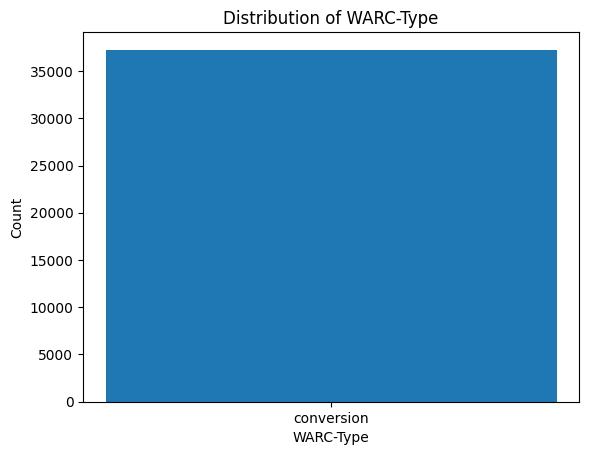

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each value in the 'WARC-Type' column
value_counts = df['WARC-Type'].value_counts()

# Create a bar chart of the value counts
plt.bar(value_counts.index, value_counts.values)

# Set the title and axis labels
plt.title('Distribution of WARC-Type')
plt.xlabel('WARC-Type')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
print(df['WARC-Type'].unique())


['conversion']


In [ ]:
print(df['WARC-Identified-Content-Language'].value_counts())


eng            15792
rus             1438
deu             1369
zho             1182
spa             1093
               ...  
ell,eng,ton        1
eng,fra,dan        1
ara,heb            1
spa,eng,ind        1
zho,nno,srp        1
Name: WARC-Identified-Content-Language, Length: 1137, dtype: int64


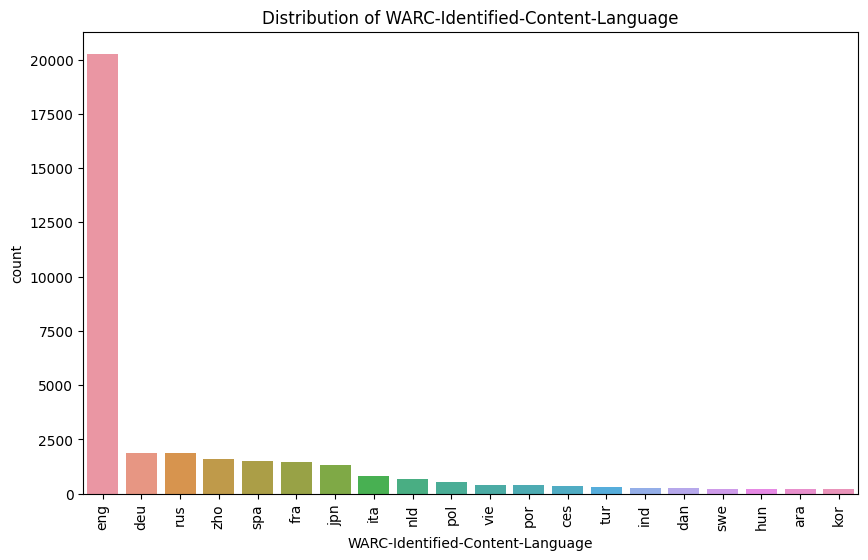

In [ ]:
# Split the rows with multiple languages
df['WARC-Identified-Content-Language_split'] = df['WARC-Identified-Content-Language'].str.split(',')

# Create a new DataFrame to store the split rows
df_split = pd.DataFrame({
    'WARC-Identified-Content-Language': [lang for langs in df['WARC-Identified-Content-Language_split'].tolist() for lang in langs],
    'count': [1/len(langs) for langs in df['WARC-Identified-Content-Language_split'].tolist() for lang in langs]
})

# Aggregate by language
df_agg = df_split.groupby('WARC-Identified-Content-Language')['count'].sum().reset_index()

# Plot the distribution of languages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=df_agg.sort_values('count', ascending=False).head(20),
            x='WARC-Identified-Content-Language', y='count', order=df_agg.sort_values('count', ascending=False)['WARC-Identified-Content-Language'].head(20))
plt.title('Distribution of WARC-Identified-Content-Language')
plt.xticks(rotation=90)
plt.show()

In [ ]:
english_percentage = (df_agg.set_index("WARC-Identified-Content-Language").loc['eng', 'count'] / df_agg['count'].sum()) * 100
print(f"The percentage of the aggregated data that is English is: {english_percentage:.2f}%")

The percentage of the aggregated data that is English is: 54.41%


In [ ]:
df['num_languages'] = df['WARC-Identified-Content-Language'].str.split(',').apply(len)

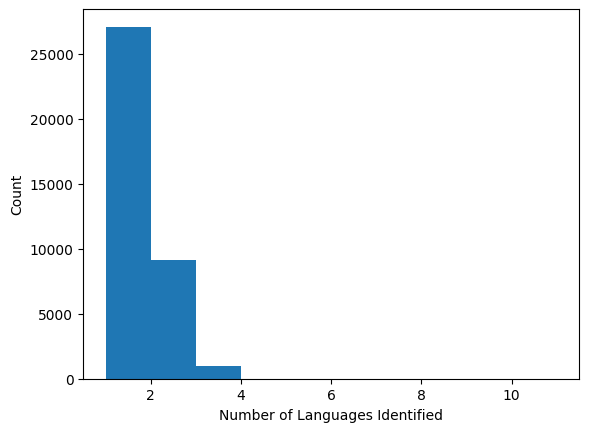

In [ ]:
import matplotlib.pyplot as plt

# plot the distribution of number of languages identified
plt.hist(df['num_languages'], bins=range(1, 12))
plt.xlabel('Number of Languages Identified')
plt.ylabel('Count')
plt.show()

In [ ]:
num_languages_dist = pd.DataFrame(df['num_languages'].value_counts())
num_languages_dist.reset_index(inplace=True)
num_languages_dist.columns = ['Num_Languages_Identified', 'Count']
num_languages_dist = num_languages_dist.sort_values('Num_Languages_Identified')
num_languages_dist.reset_index(drop=True, inplace=True)
print(num_languages_dist)

   Num_Languages_Identified  Count
0                         1  27077
1                         2   9162
2                         3   1016


In [ ]:
one_lang_pct = num_languages_dist.loc[num_languages_dist['Num_Languages_Identified'] == 1, 'Count'].sum() / len(df) * 100
print(f"{one_lang_pct:.2f}% of records have only one language identified.")

72.68% of records have only one language identified.


In [ ]:
df.head()

,WARC-Type,WARC-Target-URI,WARC-Date,WARC-Record-ID,WARC-Refers-To,WARC-Block-Digest,WARC-Identified-Content-Language,Content-Type,Content-Length,text,text_length,WARC-Identified-Content-Language_split,num_languages
0,conversion,http://020gzbanjia.com/wap/vjvsrd/253237678_39...,2023-04-01T23:32:30Z,<urn:uuid:4ca84ee0-947c-449e-8800-25ec23edd605>,<urn:uuid:b91b8454-ed45-43a2-830b-c36983dcf562>,sha1:CXLB47LESLQEHLH7ULG7AONHY6ZF3V5D,"zho,eng",text/plain,153,\n无法访问此网站\n检查是否有拼写错误。\n如果拼写无误，请尝试运行 Windos 网络诊...,80,"[zho, eng]",2
1,conversion,http://0rb.jnp836.icu/nhhn7l/811268.html,2023-04-01T23:14:47Z,<urn:uuid:7d6fb2ea-0718-4ee1-8435-6de0e4310b52>,<urn:uuid:2e9d2f6d-a787-4020-8cab-09cf04a99a20>,sha1:Y3JQ42C3IRE5AG65LVRKXZ4TND7NSTSA,kor,text/plain,3929,\nw88무료 가입 mgm바카라 조작\nw88무료 가입 mgm바카라 조작\n마카오 ...,1700,[kor],1
2,conversion,http://0sdilscn6.ty888885.com/book/198529409.html,2023-04-01T23:31:23Z,<urn:uuid:c611de57-c619-492d-98fc-d350b55ebf2b>,<urn:uuid:d6bf19a8-bcdd-490b-918a-b319ae3c7c3d>,sha1:Z4ZT2Q7SSFQEXTMPH5P56VBAT2QWD4NV,"zho,eng,nno",text/plain,1021,\n鸭脖娱乐ios版app下载网址\n鸭脖娱乐ios版app下载网址\nOpen Menu\...,516,"[zho, eng, nno]",3
3,conversion,http://10-play-deposit-casino-60-with-453.mayk...,2023-04-01T23:03:18Z,<urn:uuid:4b88d7d2-2c0e-4e31-a731-9018f9d64b3d>,<urn:uuid:cd774022-50de-43f7-bd14-7fb13a7f10f2>,sha1:KS7H4XVOKDFOURDVXU5JB7O3KAPR2O64,"ces,eng",text/plain,2622,"\nViděli jsme také Dysarta Dynama, který je na...",2403,"[ces, eng]",2
4,conversion,http://1001qfo.info/content/view/81/6/,2023-04-02T00:09:04Z,<urn:uuid:694cdf9b-6f43-4ed5-8637-d29c2c6c653d>,<urn:uuid:5d2e17e7-26fd-480b-9656-2a7e4acdb737>,sha1:HYP76FJALIV6EQASWMYY7XI76PPCYQBN,"rus,eng",text/plain,4279,\n- Что такое континентальный шельф?\n_SKIP_TO...,2453,"[rus, eng]",2


In [ ]:
def group_languages(lang_list):
    if 'eng' in lang_list:
        return 'English'
    elif any(lang in lang_list for lang in ['fra', 'ita', 'spa', 'por', 'ron', 'cat', 'glg']):
        return 'Romance languages'
    elif any(lang in lang_list for lang in ['rus', 'ukr', 'pol', 'bul', 'slv', 'hrv', 'ces', 'slk']):
        return 'Slavic languages'
    else:
        return 'Other languages'

df['Language_Group'] = df['WARC-Identified-Content-Language_split'].apply(group_languages)

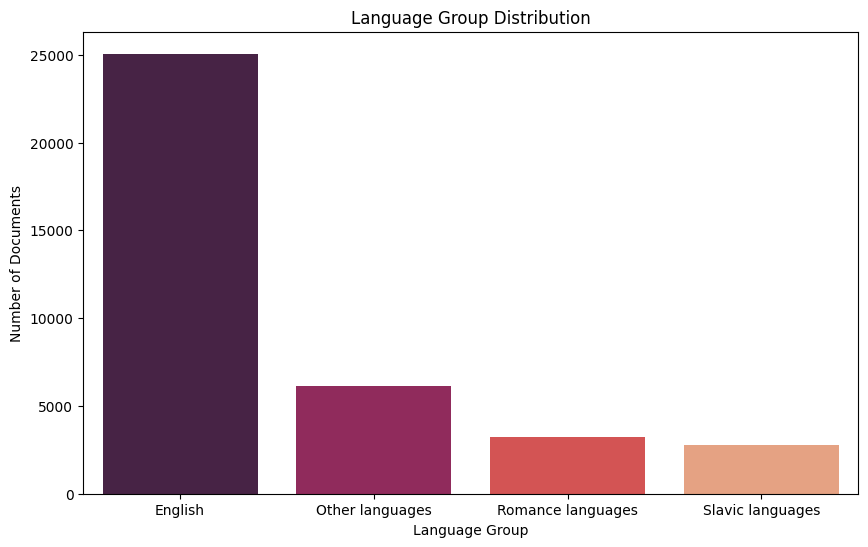

In [ ]:

# count the number of documents in each language group
group_counts = df['Language_Group'].value_counts()

# plot the distribution as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="rocket")
plt.title("Language Group Distribution")
plt.xlabel("Language Group")
plt.ylabel("Number of Documents")
plt.show()

In [ ]:
content_type_counts = df['Content-Type'].value_counts()
print(content_type_counts)

text/plain    37255
Name: Content-Type, dtype: int64


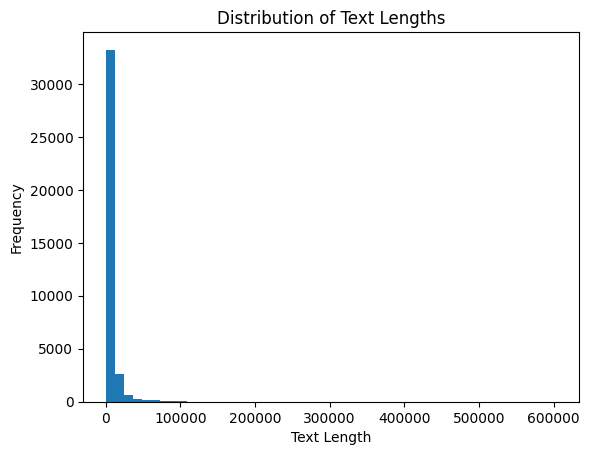

In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of each text
df['text_length'] = df['text'].str.len()

# Create a histogram of text lengths
plt.hist(df['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Remove HTML tags from text
df['text_clean'] = df['text'].sample(1000).apply(lambda x: re.sub('<.*?>', '', x))

# Remove punctuation from text
df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')

# Convert text to lowercase
df['text_clean'] = df['text_clean'].str.lower()

# Remove stop words from text
# stop_words = set(stopwords.words('english'))
stop_words = set(stopwords.words('english') + stopwords.words('russian') +
                 stopwords.words('german') + stopwords.words('spanish') +
                 stopwords.words('chinese') + stopwords.words('italian') +
                 stopwords.words('french'))

df["text_clean"] = df["text_clean"].apply(lambda x: " ".join([word for word in str(x).split() if word.lower() not in stop_words]))

# Tokenize text into individual words
df['text_clean'] = df['text_clean'].apply(nltk.word_tokenize)

# Flatten list of words into a single list
word_list = [word for sublist in df['text_clean'] for word in sublist]

# Calculate frequency distribution of words
freq_dist = nltk.FreqDist(word_list)

# Print the 20 most common words
print(freq_dist.most_common(20))

<ipython-input-26-4c93334b26e1>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')


[('nan', 36257), ('1', 2603), ('keresőoptimalizálás', 2486), ('webáruház', 1888), ('és', 1790), ('2', 1717), ('us', 1574), ('téligumi', 1528), ('nyárigumi', 1528), ('2023', 1332), ('3', 1210), ('0', 1063), ('new', 1047), ('2022', 1007), ('email', 996), ('home', 952), ('4', 918), ('5', 902), ('contact', 866), ('may', 857)]


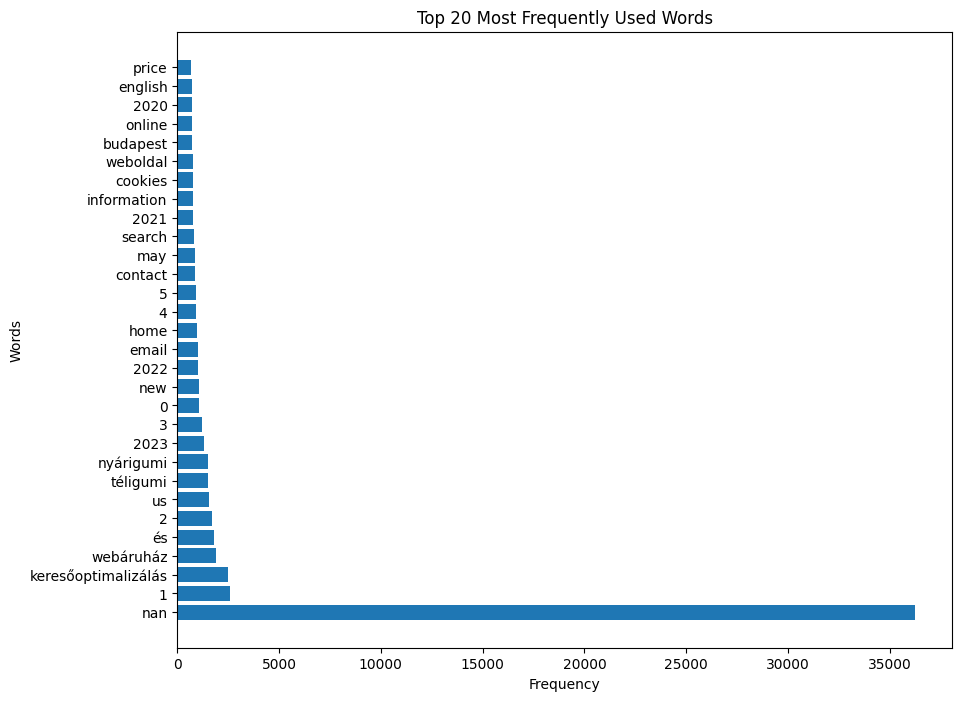

In [ ]:
import matplotlib.pyplot as plt

# get the top 20 words and their frequencies
top_words = freq_dist.most_common(30)

# create a bar chart of the top words
plt.figure(figsize=(10, 8))
plt.barh([word[0] for word in top_words], [word[1] for word in top_words])
plt.title("Top 20 Most Frequently Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

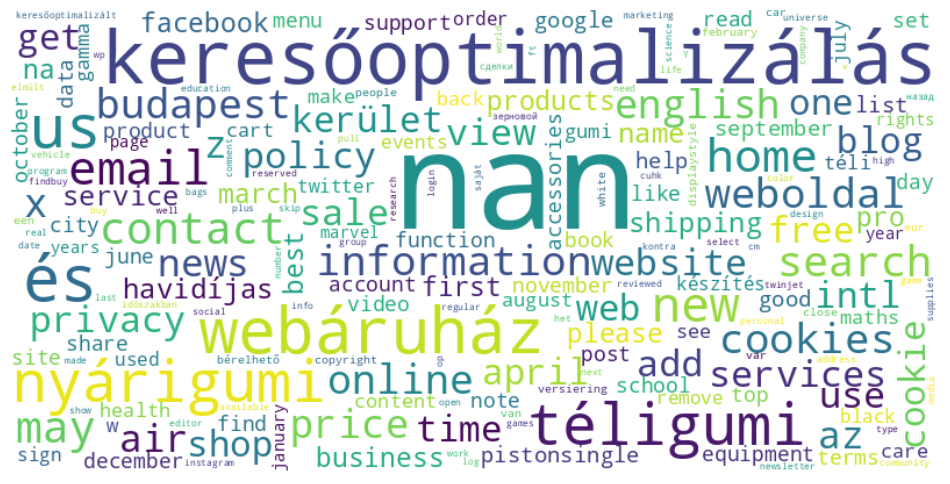

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

freq_dist_clean = nltk.FreqDist( [w for w in word_list if w.isalpha()])

# Convert the top 50 most frequent words to a dictionary
freq_dict = dict(top_words)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_clean)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
freq_dist_clean.most_common(30)

[('nan', 36257),
 ('keresőoptimalizálás', 2486),
 ('webáruház', 1888),
 ('és', 1790),
 ('us', 1574),
 ('téligumi', 1528),
 ('nyárigumi', 1528),
 ('new', 1047),
 ('email', 996),
 ('home', 952),
 ('contact', 866),
 ('may', 857),
 ('search', 816),
 ('information', 781),
 ('cookies', 771),
 ('weboldal', 771),
 ('budapest', 729),
 ('online', 723),
 ('english', 702),
 ('price', 697),
 ('x', 682),
 ('z', 653),
 ('az', 639),
 ('news', 630),
 ('air', 625),
 ('policy', 601),
 ('sale', 592),
 ('services', 585),
 ('website', 575),
 ('add', 574)]

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

               text_length  num_languages
text_length       1.000000      -0.000358
num_languages    -0.000358       1.000000


<ipython-input-30-df233e46c100>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
